In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_train(df):
    plt.plot(df['relative_time'], df['AccX'], label='X')
    plt.plot(df['relative_time'], df['AccY'], label='Y')
    plt.plot(df['relative_time'], df['AccZ'], label='Z')
    plt.plot(df['relative_time'], df['DecibelSource'], label="Sound")
    plt.legend()

In [3]:
car_df = pd.read_csv('A3 - Car ride.csv')
running_df = pd.read_csv('A3 - Running.csv')
sitting_df = pd.read_csv('A3 - Sitting.csv')
stairs_df = pd.read_csv('A3 - Stairs.csv')
walking_df = pd.read_csv('A3 - Walking.csv')

car_train = car_df[:3600]
running_train = running_df[:3600]
sit_train = sitting_df[:3600]
stairs_train = stairs_df[:3600]
walking_train = walking_df[:3600]

car_test = car_df[3600:]
running_test = running_df[3600:]
sit_test = sitting_df[3600:]
stairs_test = stairs_df[3600:]
walking_test = walking_df[3600:]

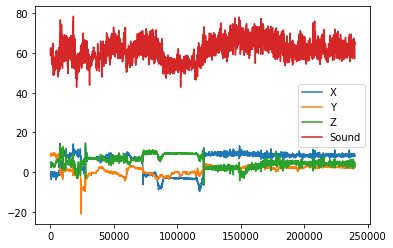

In [4]:
plot_train(car_train)

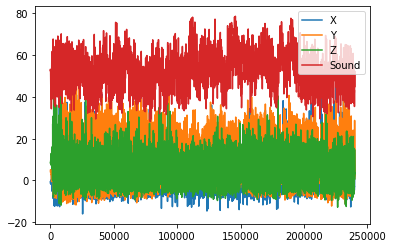

In [5]:
plot_train(running_train)

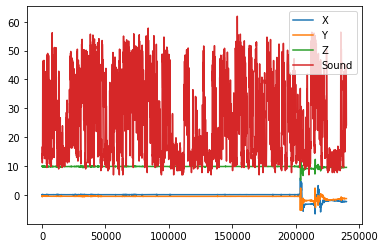

In [6]:
plot_train(sit_train)

In [ ]:
plot_train(stairs_train)

In [ ]:
plot_train(walking_train)

In [ ]:
x_train = []
y_train = []

def train(df, activity):
    start = 0
    end = 150
    all_x = []
    all_y = []
    
    while end <= 3600:
        mean = df[start : end].mean().tolist()
        std = df[start : end].std().tolist()
        all_x.append(mean)
        all_y.append(activity)
        all_x.append(std)
        all_y.append(activity)
        start += 150
        end += 150
    global x_train
    global y_train
    x_train += all_x
    y_train += all_y
    
train(sit_train, 'sitting')
train(running_train, 'running')
train(walking_train, 'walking')
train(stairs_train, 'stairs')
train(car_train, 'driving')

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [ ]:
clf.predict([sit_test.mean().tolist()])
clf.predict([running_test.mean().tolist()])
clf.predict([walking_test.mean().tolist()])
clf.predict([stairs_test.mean().tolist()])
clf.predict([car_test.mean().tolist()])